<a href="https://colab.research.google.com/github/Udonhef2bmad/TP_IA/blob/main/Copie_de_TD3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Analyse des donnée

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import *
import time
import statistics
!pip install colorama
from colorama import Fore, Back, Style
from sklearn.metrics import confusion_matrix

simplefilter("ignore", category=ConvergenceWarning)

def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

1) Charger la base de données digits disponible sous sklearn.

<Figure size 432x288 with 0 Axes>

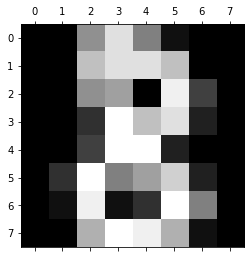

In [ ]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[8]) #index est le numéro de l’image
plt.show()

In [ ]:
X = digits.data
y = digits.target

2) Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) 
(model_selection.train_test_split).

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,test_size=0.3)

#2. Apprentissage

In [ ]:
def train_multi(C,early_stop=False):
  clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, momentum=0,early_stopping=early_stop)
  clf2.fit(X_train,y_train)
  return clf2

final cost of 1 : 1.7707389033437242 / it = 70
final cost of 2 : 1.3097604201057969 / it = 68
final cost of 3 : 0.9282481393519796 / it = 89
final cost of 4 : 0.35088812695126553 / it = 72
final cost of 5 : 0.40064446954273425 / it = 100
final cost of 6 : 0.06548630840753815 / it = 100
final cost of 7 : 0.11898925250680871 / it = 51
final cost of 8 : 0.05328488180563711 / it = 81
final cost of 9 : 0.048615255000957265 / it = 61


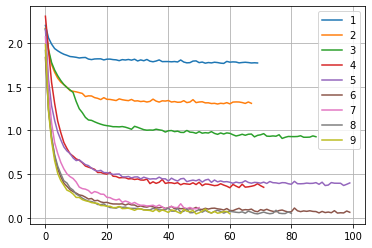

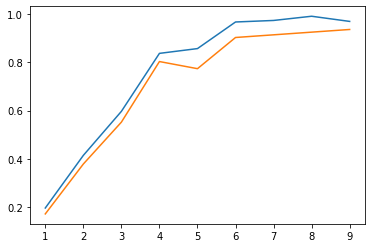

Train:  Mean:0.7562096702908159  Variance:0.07432527741032942
Test :  Mean:0.7065843621399177  Variance:0.06855594506257515


In [ ]:
#Prend environ 4m35 à s'exec
clfTotal=[]
clfScoreTrain=[]
clfScoreTest=[]
for i in range(1,10):
  clf=train_multi(i)
  loss_values = clf.loss_curve_
  plt.plot(clf.loss_curve_,label=str(i))
  plt.grid()
  plt.legend()
  clfScoreTrain.append(clf.score(X_train,y_train))
  clfScoreTest.append(clf.score(X_test,y_test))
  print("final cost of {} : {} / it = {}".format(i,loss_values[-1],len(loss_values)))
plt.show()
plt.plot(range(1,10),clfScoreTrain)
plt.plot(range(1,10),clfScoreTest)
plt.show()
print("Train:  Mean:{}  Variance:{}".format(np.mean(clfScoreTrain),np.var(clfScoreTrain)))
print("Test :  Mean:{}  Variance:{}".format(np.mean(clfScoreTest),np.var(clfScoreTest)))

In [ ]:
for i in range(0,len(clfScoreTrain)):
  print("i={} train score={}\t test score={}".format(1+i*2,clfScoreTrain[i],clfScoreTest[i]))

i=1 train score=0.1105807478122514	 test score=0.07962962962962963
i=3 train score=0.3850437549721559	 test score=0.36666666666666664
i=5 train score=0.903739061256961	 test score=0.8425925925925926
i=7 train score=0.979315831344471	 test score=0.912962962962963
i=9 train score=0.958631662688942	 test score=0.9074074074074074
i=11 train score=0.9856801909307876	 test score=0.9148148148148149
i=13 train score=0.9872712808273667	 test score=0.937037037037037
i=15 train score=0.9928400954653938	 test score=0.9407407407407408
i=17 train score=0.9976133651551312	 test score=0.95


Nous constatons que la courbe de score évolue très rapidemment entre 1 et 6 neurones cachés, puis se stabilise. Nous supposons donc que le nombre optimale de neurones est de 6 car au delà les progrès sont trop faible pour être significatif. De plus nous avons modifié les paramètres de générations du réseau neuronal afin de l'optimisé le plus possible. Nous avons à l'intérieur de l'appel de la fonction MLPclassifier: un solver adam et un learning_rate adaptive.

# 3. Cross-validation


*Afin d’améliorer les performances en généralisation du réseau de neurones, on se propose de mettre 
en oeuvre un apprentissage avec arrêt précoce (early_stopping) par cross-validation.*

*Changer les paramètres du réseau pour séparer la base d’apprentissage précédente en deux sets : 
apprentissage (80%) et validation croisée (20% : validation _fraction=0.2).*


In [ ]:
def train_multi_cross(C):
  clf = MLPClassifier(hidden_layer_sizes=C,validation_fraction=0.2,early_stopping=True, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, momentum=0)
  clf.fit(X_train,y_train)
  return clf

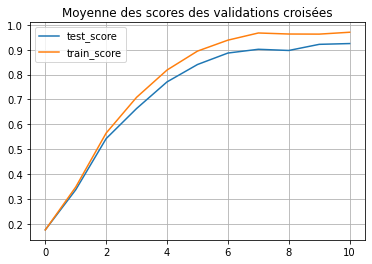

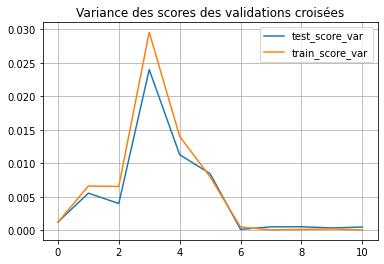

In [ ]:
#Nous faisons une validation croisée avec 5 blocs pour chaque nombre de neurones de la couche cachée
#Prend 12m09
test_score_mean=[]
train_score_mean=[]
test_score_var=[]
train_score_var=[]
for i in range(1,12):
  clf = MLPClassifier(hidden_layer_sizes=i,validation_fraction=0.2,early_stopping=True, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, momentum=0)
  cv_results = cross_validate(clf,X_train,y_train,cv=5,return_train_score=True)
  name_array=sorted(cv_results.keys())
  test_score_mean.append(np.mean(cv_results['test_score']))
  train_score_mean.append(np.mean(cv_results['train_score']))
  test_score_var.append(np.var(cv_results['test_score']))
  train_score_var.append(np.var(cv_results['train_score']))

plt.plot(test_score_mean,label="test_score")
plt.plot(train_score_mean,label="train_score")
plt.grid()
plt.legend()
plt.title("Moyenne des scores des validations croisées")
plt.show()
plt.plot(test_score_var,label="test_score_var")
plt.plot(train_score_var,label="train_score_var")
plt.grid()
plt.legend()
plt.title("Variance des scores des validations croisées")
plt.show()

Nous constatons tout d'abord que la variance reste très faible ce qui indique que les scores sont homogènes entre les blocs de la validation croisé. De plus le score évolu comme précédemment. Nous pouvons ici prendre un nombre optimale de neurones en couche caché de  7. Nous allons plus étudier le cas avec 7 neurones en couche caché

Nous remarquon également que les scores de tests sont légèrement plus faible que les scores d'entrainement ce qui est assez normal.

Nous allons répéter le meme processus avec une méthode relativement différente via validation_curve

[0.21002403489510696, 0.35104675430007026, 0.5419726417613722, 0.6485360473972088, 0.8478575314283454, 0.9397382866977241, 0.9425287083469334, 0.964796890299991, 0.9767310564473852, 0.9659970525108058, 0.9661915076703955]
[0.20762979826724845, 0.338857269335357, 0.5234395750332005, 0.6142667425535953, 0.7923543919559857, 0.8774963637513439, 0.8949313855688358, 0.9053373806361854, 0.9204199076709036, 0.9148453803832289, 0.9116802630746854]


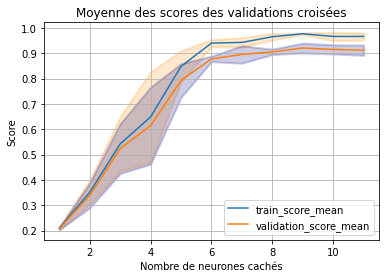

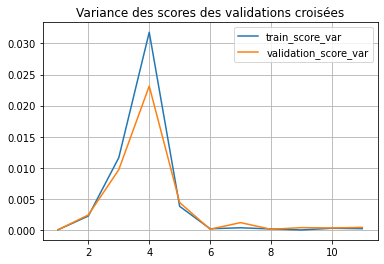

In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py
C = np.array(range(1,12))

train_scores, validation_scores = validation_curve(MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive', early_stopping=True, validation_fraction=0.2),

  X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

train_score_mean=[]
train_score_var=[]
validation_score_mean=[]
validation_score_var=[]

for i in train_scores:
  train_score_mean.append(np.mean(i))
  train_score_var.append(np.var(i))

for i in validation_scores:
  validation_score_mean.append(np.mean(i))
  validation_score_var.append(np.var(i))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)
test_scores_std = np.std(validation_scores, axis=1)

plt.title("Validation Curve with MLPClassifier")
plt.xlabel("Nombre de neurones cachés")
plt.ylabel("Score")
lw = 2
plt.fill_between(
    C,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.fill_between(
    C,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)

plt.plot(C,train_score_mean,label="train_score_mean")
plt.plot(C,validation_score_mean,label="validation_score_mean")
plt.grid()
plt.legend()
plt.title("Moyenne des scores des validations croisées")
plt.show()

plt.plot(C,train_score_var,label="train_score_var")
plt.plot(C,validation_score_var,label="validation_score_var")
plt.grid()
plt.legend()
plt.title("Variance des scores des validations croisées")
plt.show()


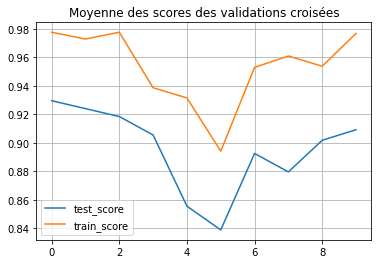

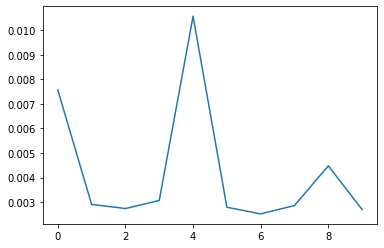

Variance en test 0.0007902606310013713 
Variance en train 0.0006372523890081883


In [ ]:
#Prend 10m24
test_score_mean=[]
train_score_mean=[]
listIA=[]
list_time=[]

for i in range(0,10):
  clf = MLPClassifier(hidden_layer_sizes=7,validation_fraction=0.2,early_stopping=True, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', max_iter=100, momentum=0)
  clf.fit(X_train,y_train)

  start_time = time.time()
  score_train=clf.score(X_train,y_train)
  list_time.append((time.time() - start_time))

  score_test=clf.score(X_test,y_test)
  test_score_mean.append(np.mean(score_test))
  train_score_mean.append(np.mean(score_train))
  listIA.append(clf)

plt.plot(test_score_mean,label="test_score")
plt.plot(train_score_mean,label="train_score")
plt.grid()
plt.legend()
plt.title("Moyenne des scores des validations croisées")
plt.show()

plt.plot(list_time)
plt.show()

test_score_var=np.var(test_score_mean)
train_score_var=np.var(train_score_mean)

print("Variance en test {} \nVariance en train {}".format(test_score_var,train_score_var))

max_value=max(train_score_mean)
indexed=train_score_mean.index(max_value)
bestIA=listIA[indexed]


In [ ]:
y_pred=bestIA.predict(X_test)
confu=confusion_matrix(y_test, y_pred)
print(confu)

[[61  0  0  0  3  0  0  1  0  0]
 [ 0 59  0  0  0  0  0  0  0  1]
 [ 0  2 47  0  0  0  0  0  2  0]
 [ 0  0  1 46  0  0  0  0  3  0]
 [ 0  0  0  0 55  0  0  1  0  0]
 [ 0  2  0  0  0 52  0  0  2  0]
 [ 0  1  0  0  1  0 44  0  1  0]
 [ 0  0  0  0  1  1  0 48  0  2]
 [ 0  2  1  1  0  3  1  1 46  1]
 [ 0  0  1  0  0  0  0  2  0 44]]


Nous constatons que les variances sont relativement faibles ce qui indique que les variations de scores entre les différents entrainements sont très faibles. Les scores de tests et d'entrainements sont très lié avec environ 5% de succès en moins pour les tests

test_score mean : 0.9354078634955129
train_score mean : 0.9386641286009257


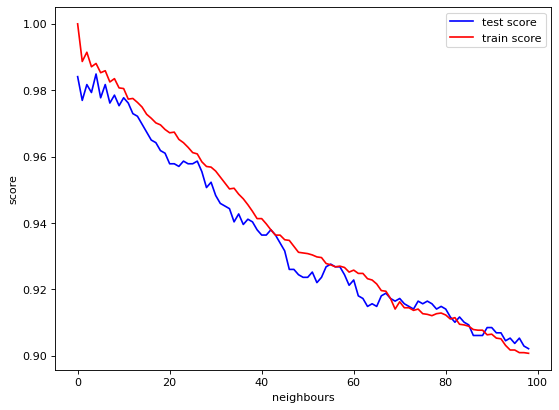

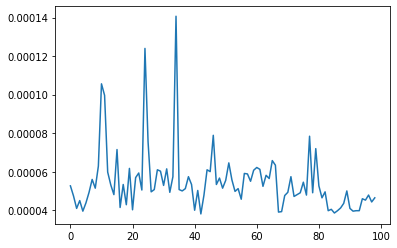

Nous mettons en moyenne 5.461952903053977e-05s à évaluer notre score


In [ ]:
from matplotlib.pyplot import figure

def NN_Classify(n_neighbors):
  one_NN = KNeighborsClassifier(n_neighbors, algorithm='brute')
  one_NN.fit(X_train, y_train)
  return one_NN

train_score=[]
test_score=[]
list_time=[]

for i in range(1,100):

  #init classifier for i neighbours
  one_NN = NN_Classify(i)

  #cross validate model with cv of 5
  cv_results = cross_validate(one_NN,X_train,y_train,cv=5,return_train_score=True)

  name_array=sorted(cv_results.keys())

  #append scores to score list
  #print("test_score: {}\t train_score: {}".format(cv_results['test_score'], cv_results['train_score']))
  
  start_time = time.time()
  test_score.append(np.mean(cv_results['test_score']))
  list_time.append((time.time() - start_time))
  train_score.append(np.mean(cv_results['train_score']))

#plot scores
figure(figsize=(8, 6), dpi=80)
plt.plot(test_score, "-b")
plt.plot(train_score, "-r")
plt.gca().legend(("test score", "train score"))
plt.xlabel("neighbours")
plt.ylabel("score")

print("test_score mean :",np.mean(test_score))
print("train_score mean :",np.mean(train_score))

plt.show()

plt.plot(list_time)
plt.show()

print("Nous mettons en moyenne {}s à évaluer notre score".format(np.mean(list_time)))

#4. Rejet

In [ ]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))
    return y_masked.filled(-1)
 
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))
    return y_masked.filled(-1)

In [ ]:
clf=train_multi_cross(7)

In [ ]:
longueurTotal=15
pos=0
tauxReussite=0.85
masker=argmax_reject_threshold(clf.predict_proba(X_test),tauxReussite)
prediction=clf.predict_proba(X_test)[0:longueurTotal]
truncadte=np.array(trunc(np.array(prediction), decs=3))
for i in truncadte:
  here=list(i)
  trie=sorted(here,reverse=True)
  duo=[]
  for a in trie:
    duo.append([here.index(a),a])
  if duo[0][1] < 0.5:
      print(Fore.RED+str(pos)+" "+str(duo[0:3])+Fore.RESET)
  else:
      print(str(pos)+" "+str(duo[0:3]))
  pos+=1

print("\n")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(y_test[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(y_test[i]),end=" ")
print("")
for i in range(0,longueurTotal):
  if(masker[i]==-1):
    print(Fore.RED+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  elif(masker[i] != y_test[i]):
    print(Fore.BLUE+"{:02d}".format(masker[i])+Fore.RESET,end=" ")
  else:
    print("{:02d}".format(masker[i]),end=" ")
print("\n")
unique, counts = np.unique(masker, return_counts=True)
nbrOutput=len(masker)
nbrEchecCuissant=dict(zip(unique, counts))[-1]

print("Il y a en tout {} sorties dont {} avec une valeur max inférieur à {} ce qui fais un score de {}".format(nbrOutput,nbrEchecCuissant,tauxReussite,trunc(nbrEchecCuissant/nbrOutput,6)))

0 [[9, 0.907], [8, 0.031], [5, 0.027]]
1 [[3, 0.959], [9, 0.027], [5, 0.005]]
2 [[0, 0.996], [6, 0.002], [1, 0.0]]
3 [[7, 0.988], [0, 0.004], [2, 0.003]]
4 [[5, 0.993], [7, 0.003], [3, 0.002]]
5 [[4, 0.989], [6, 0.01], [0, 0.0]]
6 [[3, 0.959], [9, 0.027], [5, 0.005]]
7 [[3, 0.909], [2, 0.07], [5, 0.015]]
8 [[5, 0.99], [3, 0.005], [8, 0.002]]
9 [[2, 0.988], [3, 0.011], [0, 0.0]]
10 [[9, 0.988], [3, 0.009], [0, 0.0]]
11 [[8, 0.99], [6, 0.003], [3, 0.002]]
12 [[9, 0.917], [5, 0.047], [3, 0.024]]
13 [[6, 0.961], [4, 0.027], [0, 0.006]]
14 [[1, 0.825], [2, 0.086], [6, 0.05]]


09 03 00 07 05 04 03 03 05 02 09 08 09 06 01 
09 03 00 07 05 04 03 03 05 02 09 08 09 06 -1 

Il y a en tout 540 sorties dont 67 avec une valeur max inférieur à 0.85 ce qui fais un score de 0.124074


Le rejet de distance

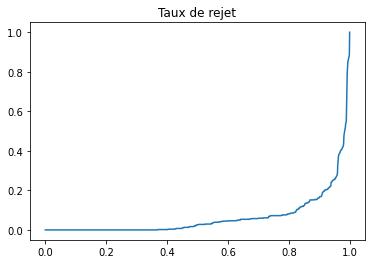

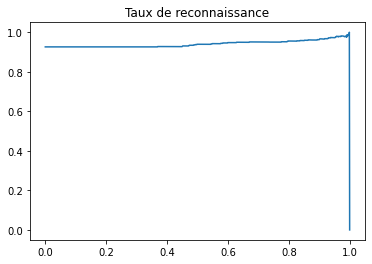

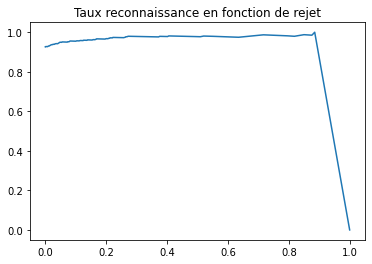

In [ ]:
nbrunder=[]
ordonnee=[]
totalRatio=[]
same=[]
prediction=clf.predict_proba(X_test)
for i in np.linspace(0,1,1000,endpoint=False):
  masker=argmax_reject_threshold(prediction,i)
  unique, counts = np.unique(masker, return_counts=True)
  nbrOutput=len(masker)
  try:    
    nbrEchecCuissant=dict(zip(unique, counts))[-1]
    nbrunder.append(nbrEchecCuissant/nbrOutput)
  except Exception as e:
    nbrunder.append(0)
  
  filtrer=[]
  value=[]
  ratio=0
  filtrer=masker[np.where(masker != -1)[0]]
  value=y_test[np.where(masker != -1)[0]]
  for z in range(0,len(filtrer)):
    if(filtrer[z]==value[z]):
      same.append(filtrer[z])
      ratio+=1
  if(len(filtrer)==0):
    totalRatio.append(0)
  else:
    totalRatio.append(ratio/len(filtrer))

  ordonnee.append(i)
plt.plot(ordonnee,nbrunder)
plt.title("Taux de rejet")
plt.show()
plt.plot(ordonnee,totalRatio)
plt.title("Taux de reconnaissance")
plt.show()
plt.plot(nbrunder,totalRatio)
plt.title("Taux reconnaissance en fonction de rejet")
plt.show()

Le rejet d’ambigüité

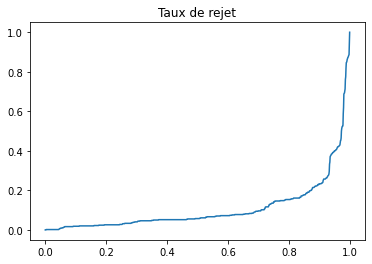

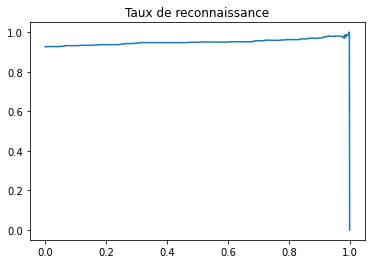

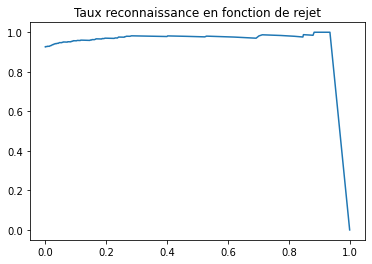

In [ ]:
nbrunder=[]
ordonnee=[]
totalRatio=[]
same=[]
prediction=clf.predict_proba(X_test)
for i in np.linspace(0,1,1000,endpoint=False):
  masker=argmax_top2_reject_threshold(prediction,i)
  unique, counts = np.unique(masker, return_counts=True)
  nbrOutput=len(masker)
  try:    
    nbrEchecCuissant=dict(zip(unique, counts))[-1]
    nbrunder.append(nbrEchecCuissant/nbrOutput)
  except Exception as e:
    nbrunder.append(0)
  
  filtrer=[]
  value=[]
  ratio=0
  filtrer=masker[np.where(masker != -1)[0]]
  value=y_test[np.where(masker != -1)[0]]
  for z in range(0,len(filtrer)):
    if(filtrer[z]==value[z]):
      same.append(filtrer[z])
      ratio+=1
  if(len(filtrer)==0):
    totalRatio.append(0)
  else:
    totalRatio.append(ratio/len(filtrer))

  ordonnee.append(i)
plt.plot(ordonnee,nbrunder)
plt.title("Taux de rejet")
plt.show()
plt.plot(ordonnee,totalRatio)
plt.title("Taux de reconnaissance")
plt.show()
plt.plot(nbrunder,totalRatio)
plt.title("Taux reconnaissance en fonction de rejet")
plt.show()

#5. Cascade de classifieurs


In [ ]:
def NN_Classify(n_neighbors):
  one_NN = KNeighborsClassifier(n_neighbors, algorithm='brute')
  one_NN.fit(X_train, y_train)
  return one_NN

prediction=clf.predict_proba(X_test)
clf=train_multi_cross(7)
one_NN = NN_Classify(10)

masker=argmax_reject_threshold(prediction,0.9)

ratio=0
filtrerAccept   =masker[np.where(masker != -1)[0]]
value           =y_test[np.where(masker != -1)[0]]

filtrerRejectX  =X_test[np.where(masker == -1)[0]]
filtrerRejectY  =y_test[np.where(masker == -1)[0]]
for z in range(0,len(filtrerAccept)):
  if(filtrerAccept[z]==value[z]):
    ratio+=1

totalRatio=ratio/len(filtrerAccept)
#print((one_NN.score(filtrerRejectX,filtrerRejectY)*len(filtrerRejectX)+totalRatio*len(filtrerAccept))/X_test)
print("Le score pour la partie MLPClassifier est de {}\nLe score de la partie KNN est de {}\nLe bilan total des scores est de {}".format(totalRatio,one_NN.score(filtrerRejectX,filtrerRejectY),(one_NN.score(filtrerRejectX,filtrerRejectY)*len(filtrerRejectX)+ratio)/len(X_test)))

print("La matrice de confusion est:")
confu=confusion_matrix(value, filtrerAccept)
print(confu)

Le score pour la partie MLPClassifier est de 0.9761092150170648
Le score de la partie KNN est de 0.9554655870445344
Le bilan total des scores est de 0.9666666666666667
La matrice de confusion est:
[[48  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0]
 [ 0  0  1  0  0 43  0  0  0]
 [ 0  0  0  0  2  0 39  0  0]
 [ 0  0  1  0  1  2  0 31  0]
 [ 0  0  0  0  0  0  0  0  5]]
